In [81]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
train_data = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
test_data = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')


In [83]:

train_data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [84]:
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [85]:
train_data = train_data[train_data['Credit_History'].notna()]


In [86]:
df = train_data.copy()

In [87]:
df.drop(columns='Loan_ID',inplace=True)

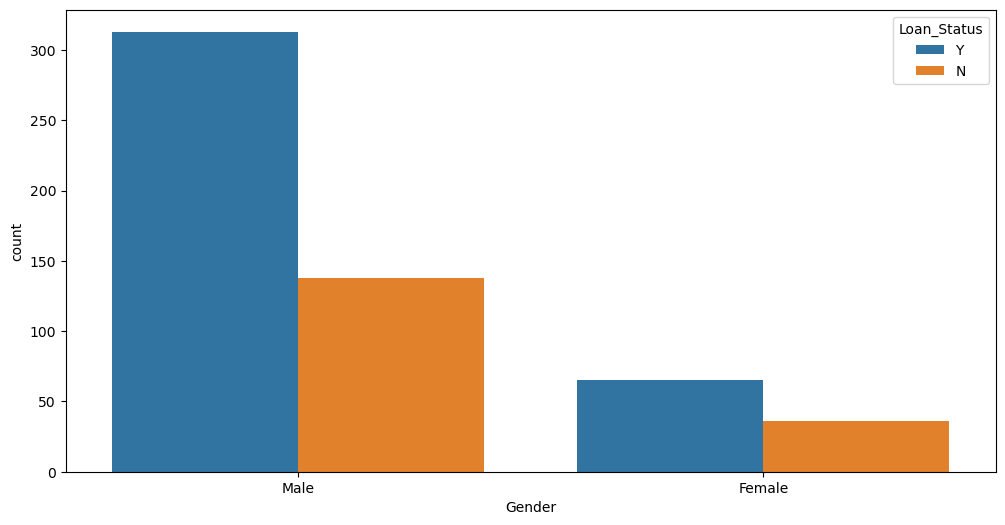

In [88]:
import seaborn as sns
plt.figure(figsize = (12,6))
sns.countplot(data=df, x='Gender', hue='Loan_Status')
plt.show()

In [89]:
df['Loan_Status'].value_counts()

Loan_Status
Y    385
N    179
Name: count, dtype: int64

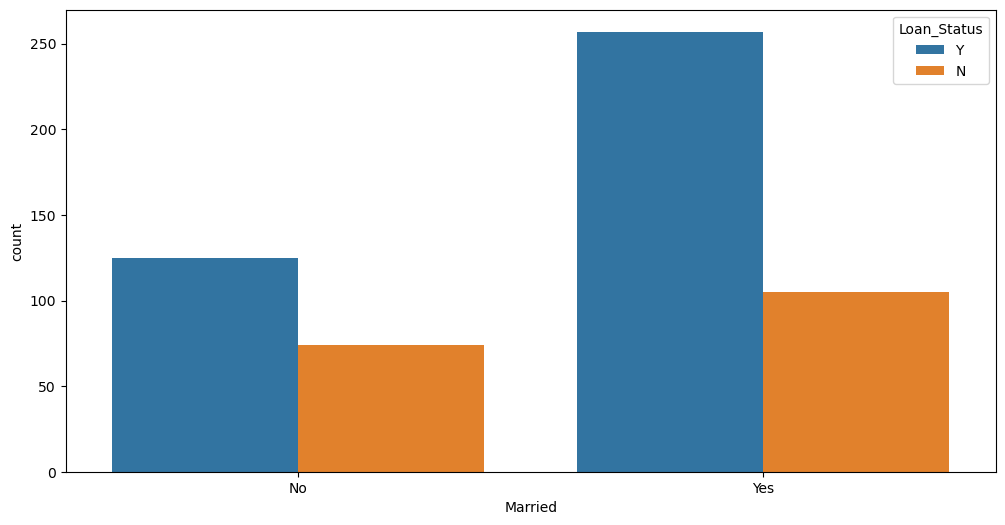

In [90]:
import seaborn as sns
plt.figure(figsize = (12,6))
sns.countplot(data=df, x='Married', hue='Loan_Status')
plt.show()

In [91]:
df['Dependents'] = df['Dependents'].apply(lambda x : 3 if x == '3+' else x)

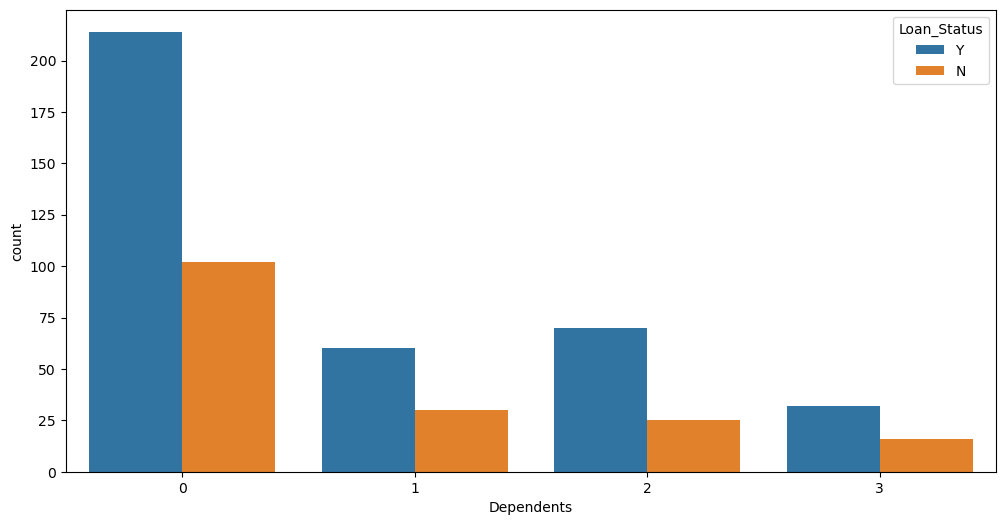

In [92]:
import seaborn as sns
plt.figure(figsize = (12,6))
sns.countplot(data=df, x='Dependents', hue='Loan_Status')
plt.show()

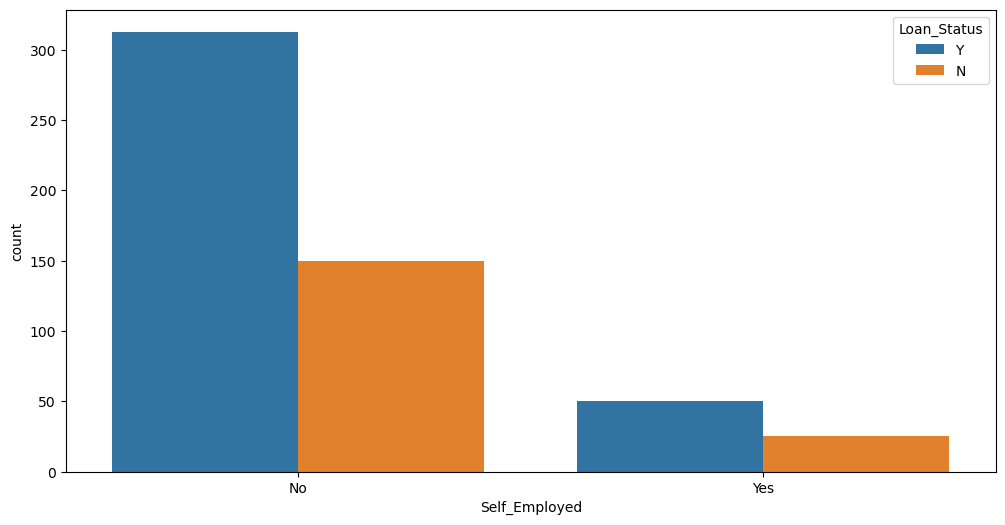

In [93]:

plt.figure(figsize = (12,6))
sns.countplot(data=df, x='Self_Employed', hue='Loan_Status')
plt.show()

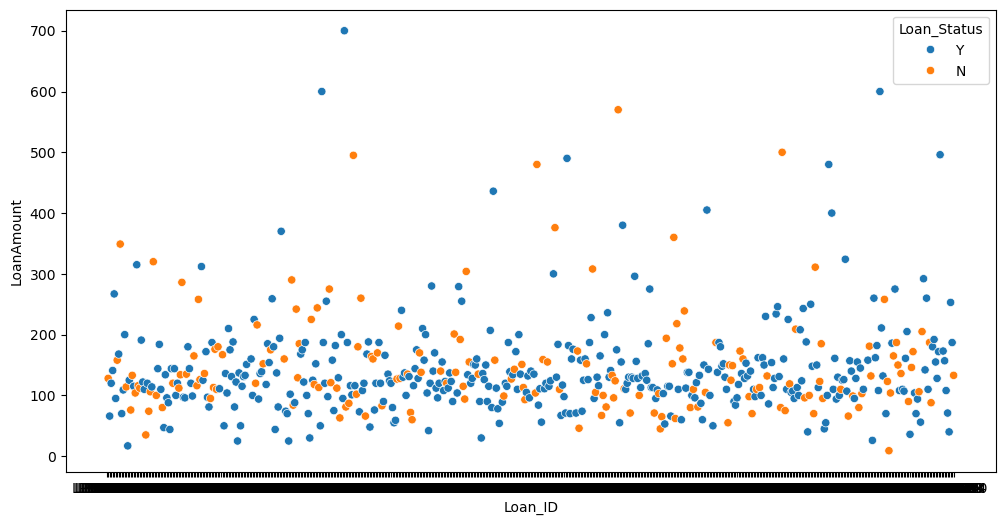

In [94]:

plt.figure(figsize = (12,6))
sns.scatterplot(data=train_data,x='Loan_ID' ,  y='LoanAmount', hue='Loan_Status')
plt.show()

In [95]:
df = df[df['LoanAmount']<450]
train_data = train_data[train_data['LoanAmount']<450]


In [96]:
df['Gender'] = df['Gender'].apply(lambda x : 1 if x == 'Male' else 0)

In [97]:
df['Self_Employed'] = df['Self_Employed'].apply(lambda x : 1 if x == 'Yes' else 0)
df['Married'] = df['Married'].apply(lambda x : 1 if x == 'Yes' else 0)
df['Education'] = df['Education'].apply(lambda x : 1 if x == 'Graduate' else 0)
df['Loan_Status'] = df['Loan_Status'].apply(lambda x : 1 if x == 'Y' else 0)



In [98]:
# One-hot encode Dependents and Property_Area
df = pd.get_dummies(df, columns=['Dependents', 'Property_Area'], drop_first=True)

# Display the first few rows to verify
print(df.head())


   Gender  Married  Education  Self_Employed  ApplicantIncome  \
1       1        1          1              0             4583   
2       1        1          1              1             3000   
3       1        1          0              0             2583   
4       1        0          1              0             6000   
5       1        1          1              1             5417   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
5             4196.0       267.0             360.0             1.0   

   Loan_Status  Dependents_0  Dependents_1  Dependents_2  \
1            0         False          True         False   
2            1          True         False         False   
3       

In [99]:
df_encoded

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Property_Area_Semiurban,Property_Area_Urban
1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,False,True,False,False,False
2,1,1,1,1,3000,0.0,66.0,360.0,1.0,1,True,False,False,False,True
3,1,1,0,0,2583,2358.0,120.0,360.0,1.0,1,True,False,False,False,True
4,1,0,1,0,6000,0.0,141.0,360.0,1.0,1,True,False,False,False,True
5,1,1,1,1,5417,4196.0,267.0,360.0,1.0,1,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,1,0,2900,0.0,71.0,360.0,1.0,1,True,False,False,False,False
610,1,1,1,0,4106,0.0,40.0,180.0,1.0,1,False,False,False,False,False
611,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,False,True,False,False,True
612,1,1,1,0,7583,0.0,187.0,360.0,1.0,1,False,False,True,False,True


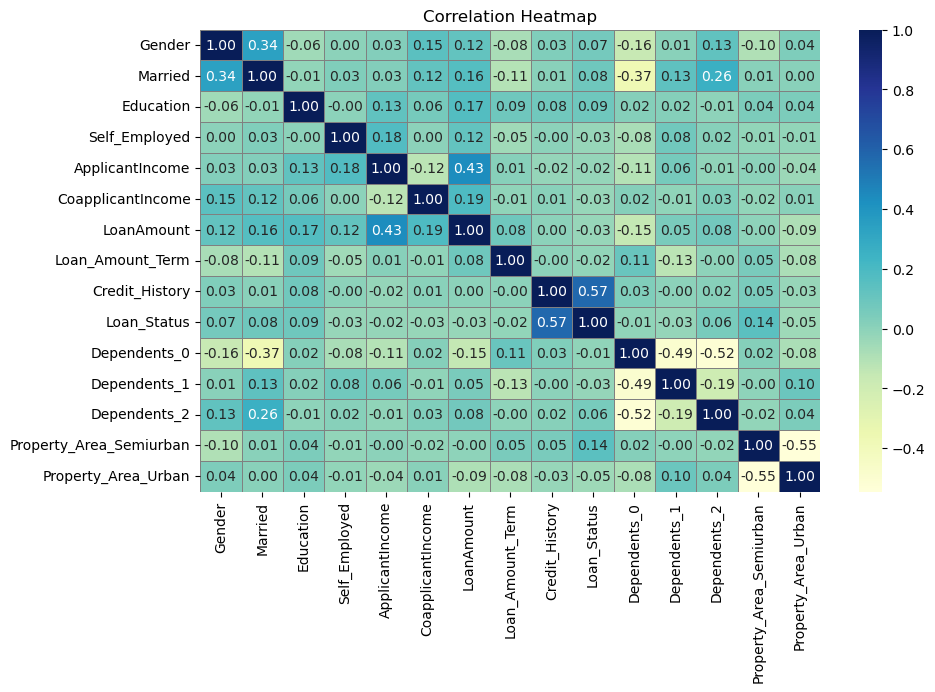

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix (only numeric columns)
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5, linecolor='gray')
plt.title("Correlation Heatmap")
plt.show()


In [102]:
df.Loan_Status.value_counts()

Loan_Status
1    368
0    165
Name: count, dtype: int64

In [103]:
x = df.drop(columns='Loan_Status')
y = df['Loan_Status']

In [107]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533 entries, 1 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   533 non-null    int64  
 1   Married                  533 non-null    int64  
 2   Education                533 non-null    int64  
 3   Self_Employed            533 non-null    int64  
 4   ApplicantIncome          533 non-null    int64  
 5   CoapplicantIncome        533 non-null    float64
 6   LoanAmount               533 non-null    float64
 7   Loan_Amount_Term         519 non-null    float64
 8   Credit_History           533 non-null    float64
 9   Loan_Status              533 non-null    int64  
 10  Dependents_0             533 non-null    bool   
 11  Dependents_1             533 non-null    bool   
 12  Dependents_2             533 non-null    bool   
 13  Property_Area_Semiurban  533 non-null    bool   
 14  Property_Area_Urban      533 no

In [108]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Dummy predictions (predict all loans as approved → class '1')
y_dummy_pred = [1] * len(y_test)

# Evaluate dummy model
print("📉 Dummy Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_dummy_pred))
print("F1 Score:", f1_score(y_test, y_dummy_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_dummy_pred))


📉 Dummy Model Performance:
Accuracy: 0.616822429906542
F1 Score: 0.7630057803468208
Confusion Matrix:
 [[ 0 41]
 [ 0 66]]


In [114]:
from sklearn.impute import SimpleImputer

# Create an imputer for numerical features (mean or median)
imputer = SimpleImputer(strategy='median')

# Fit on training data, transform both train and test
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)
from sklearn.linear_model import LogisticRegression

# Initialize and train model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(x_train, y_train)

# Predict on test set
y_pred = logreg.predict(x_test)

# Evaluate logistic regression
print("\n📊 Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# Predict class probabilities
y_proba = logreg.predict_proba(x_test)

# Show first 5 predictions
print("🔍 Predicted Probabilities (first 5 rows):")
for i in range(5):
    print(f"Sample {i+1} - Class 0 (Loan Rejected): {y_proba[i][0]:.4f}, Class 1 (Loan Approved): {y_proba[i][1]:.4f}")



📊 Logistic Regression Performance:
Accuracy: 0.8037383177570093
F1 Score: 0.8609271523178808
Confusion Matrix:
 [[21 20]
 [ 1 65]]
🔍 Predicted Probabilities (first 5 rows):
Sample 1 - Class 0 (Loan Rejected): 0.0443, Class 1 (Loan Approved): 0.9557
Sample 2 - Class 0 (Loan Rejected): 0.1872, Class 1 (Loan Approved): 0.8128
Sample 3 - Class 0 (Loan Rejected): 0.0345, Class 1 (Loan Approved): 0.9655
Sample 4 - Class 0 (Loan Rejected): 0.2127, Class 1 (Loan Approved): 0.7873
Sample 5 - Class 0 (Loan Rejected): 0.1642, Class 1 (Loan Approved): 0.8358


c:\Users\SubodhG\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



📊 Decision Tree Performance:
Accuracy: 0.7663551401869159
F1 Score: 0.8226950354609929


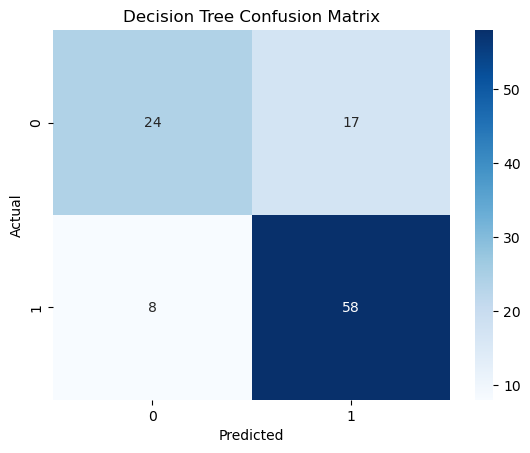


📊 Random Forest Performance:
Accuracy: 0.794392523364486
F1 Score: 0.8513513513513513


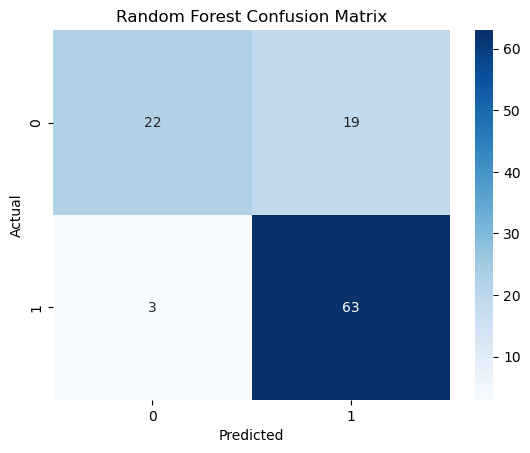


📊 SVM Performance:
Accuracy: 0.794392523364486
F1 Score: 0.8552631578947368


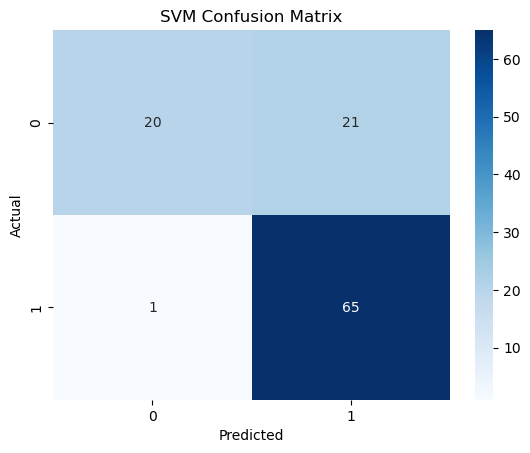


📊 Gradient Boosting Performance:
Accuracy: 0.7476635514018691
F1 Score: 0.8163265306122449


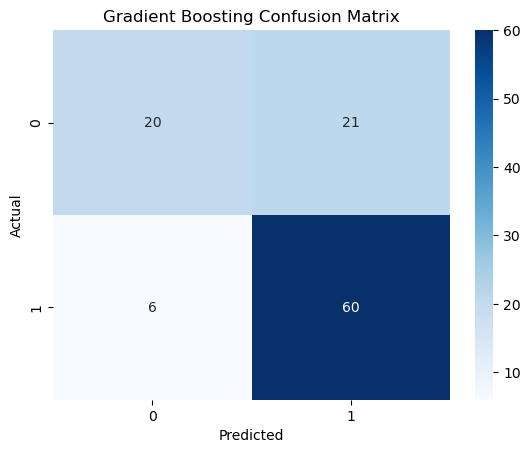

In [113]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(name, y_test, y_pred):
    print(f"\n📊 {name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

evaluate_model("Decision Tree", y_test, y_pred_dt)

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

evaluate_model("Random Forest", y_test, y_pred_rf)

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Scale data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(x_train_scaled, y_train)
y_pred_svm = svm_model.predict(x_test_scaled)

evaluate_model("SVM", y_test, y_pred_svm)

from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(x_train, y_train)
y_pred_gb = gb_model.predict(x_test)

evaluate_model("Gradient Boosting", y_test, y_pred_gb)

